In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.utils import shuffle

In [17]:
path=r"G:\dataset\Alzheimers-ADNI"
# path=r"G:\dataset\MRI\Training"

In [18]:
# class_names = ['AD','CN','MCI']
class_names = ["EMCI","LMCI","MCI","AD","CN"]

In [19]:
trainData=[]
trainDataLables=[]
for name in class_names:
    # images = [cv2.imread(file) for file in glob.glob(path+"\\"+name+r'\*.png')]
    images = [cv2.imread(file,cv2.COLOR_BGR2GRAY) for file in glob.glob(path+"\\train\\"+name+r'\*.jpg')]
    for i in images:
        # i=cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
        i=cv2.resize(i,(128,128))
        trainData.append(np.asarray(i))
        trainDataLables.append(name)


trainData=np.asarray(trainData)
trainDataLables=np.asarray(trainDataLables)
trainData,trainDataLables=shuffle(trainData,trainDataLables)

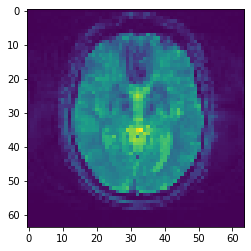

In [20]:
img=trainData[100]
plt.imshow(img)

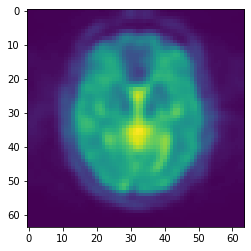

In [21]:
blur = cv2.GaussianBlur(img,(5,5),0)
plt.imshow(blur)

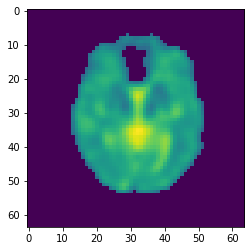

In [22]:
ret, thresh = cv2.threshold(blur, 60, 255, cv2.THRESH_TOZERO)
plt.imshow(thresh)

In [23]:
def filter(img,kernal=(5,5),thresh=60):
    blur = cv2.GaussianBlur(img,kernal,0)
    # ret, res = cv2.threshold(blur, thresh, 255, cv2.THRESH_TOZERO)
    res=cv2.Canny(img,100,255)
    return res

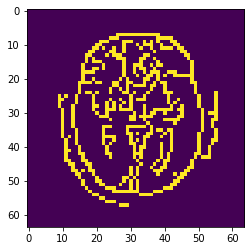

In [24]:
edge=cv2.Canny(img,100,255)
plt.imshow(edge)

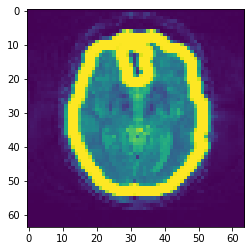

In [25]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                     
# draw contours on the original image
image_copy = trainData[100].copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(255,0,0), thickness=2, lineType=cv2.LINE_AA)
               
# see the results
plt.imshow(image_copy)


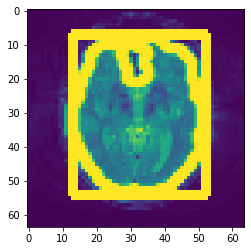

In [26]:
c = max(contours, key = cv2.contourArea)

x,y,w,h = cv2.boundingRect(c)
# draw the book contour (in green)
rec=cv2.rectangle(image_copy,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(rec)

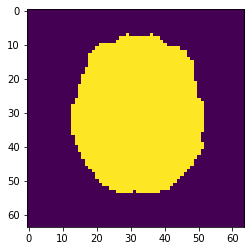

In [27]:
mask = np.zeros(image_copy.shape, np.uint8)
brain=cv2.drawContours(mask, [c], 0, (255),-1)
plt.imshow(brain)

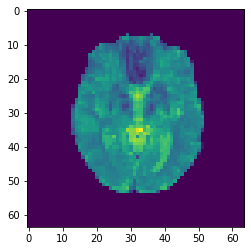

In [28]:
out = np.zeros_like(img) # Extract out the object and place into output image
out[mask == 255] = img[mask == 255]
plt.imshow(out)

In [29]:
def brainExtraction(img,threshVal):
    blur = cv2.GaussianBlur(img,(5,5),0)
    ret, thresh = cv2.threshold(blur, threshVal, 255, cv2.THRESH_TOZERO)
    # detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
    contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)                       
    # draw contours on the original image
    image_copy = img.copy()
    cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(255,0,0), thickness=2, lineType=cv2.LINE_AA)
    c = max(contours, key = cv2.contourArea)
    mask = np.zeros(image_copy.shape, np.uint8)
    cv2.drawContours(mask, [c], 0, (255),-1)
    out = np.zeros_like(img) # Extract out the object and place into output image
    out[mask == 255] = img[mask == 255]
    return out

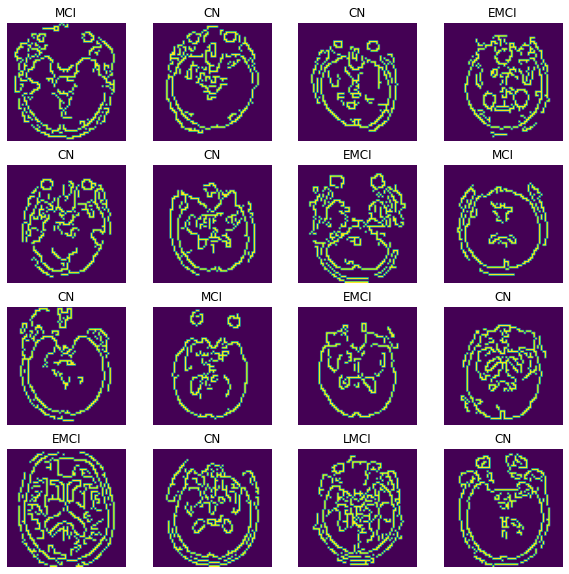

In [30]:
plt.figure(figsize=(10, 10))
i=0
for x in range(16):
    ax = plt.subplot(4, 4, i+1)
    i+=1
    plt.imshow(filter(trainData[x]))
    plt.title(trainDataLables[x])
    plt.axis("off")